# AIMedic - Homework 1

Name: `Mahsa Amani`

Email: `mahsa.ama1391@gmail.com`

---

## Import requirements for load and visualization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load data

In [3]:
data = pd.read_csv("dataR2.csv")

In [4]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
# some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


## Shuffle data

In [6]:
# Shuffle
data = data.sample(frac = 1)
# add index for visualization
data["index"] = range(data.shape[0])

## Visualisation


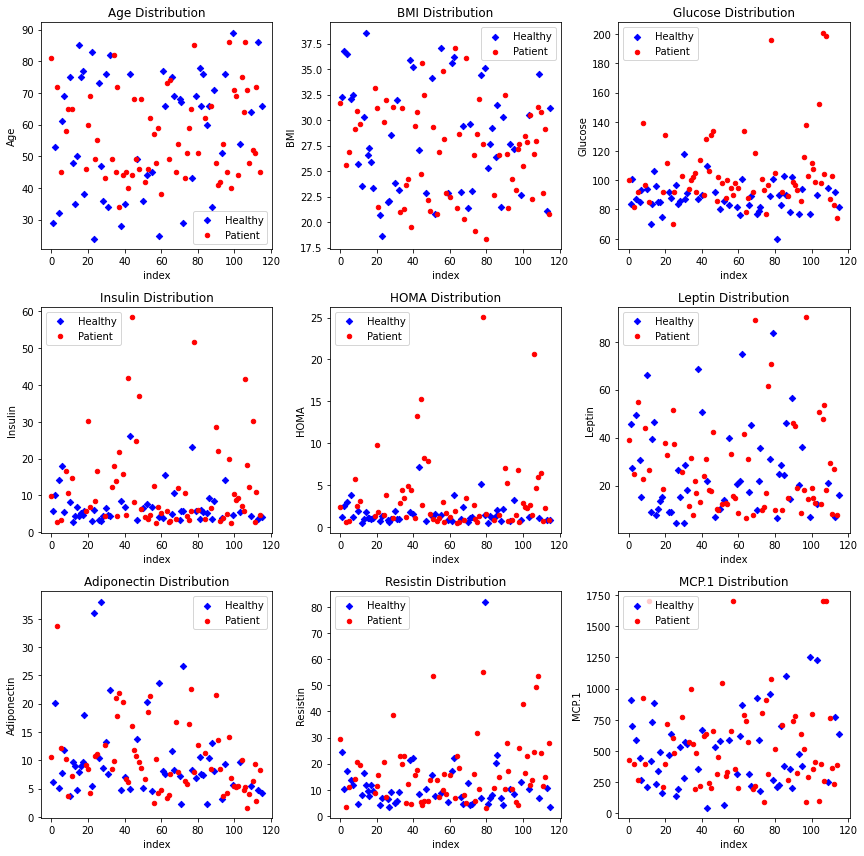

In [7]:
# one feature
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
features = data.columns[:-1]
for i, ax in enumerate(axes.flatten()):
    data[data.Classification==1].plot(kind='scatter', x='index', y=features[i], ax=ax, label="Healthy", color="blue", marker="D")
    data[data.Classification==2].plot(kind='scatter', x='index', y=features[i], ax=ax, label="Patient", color="red")
    ax.legend()
    ax.set_title(str(features[i]) + ' Distribution')
plt.tight_layout()

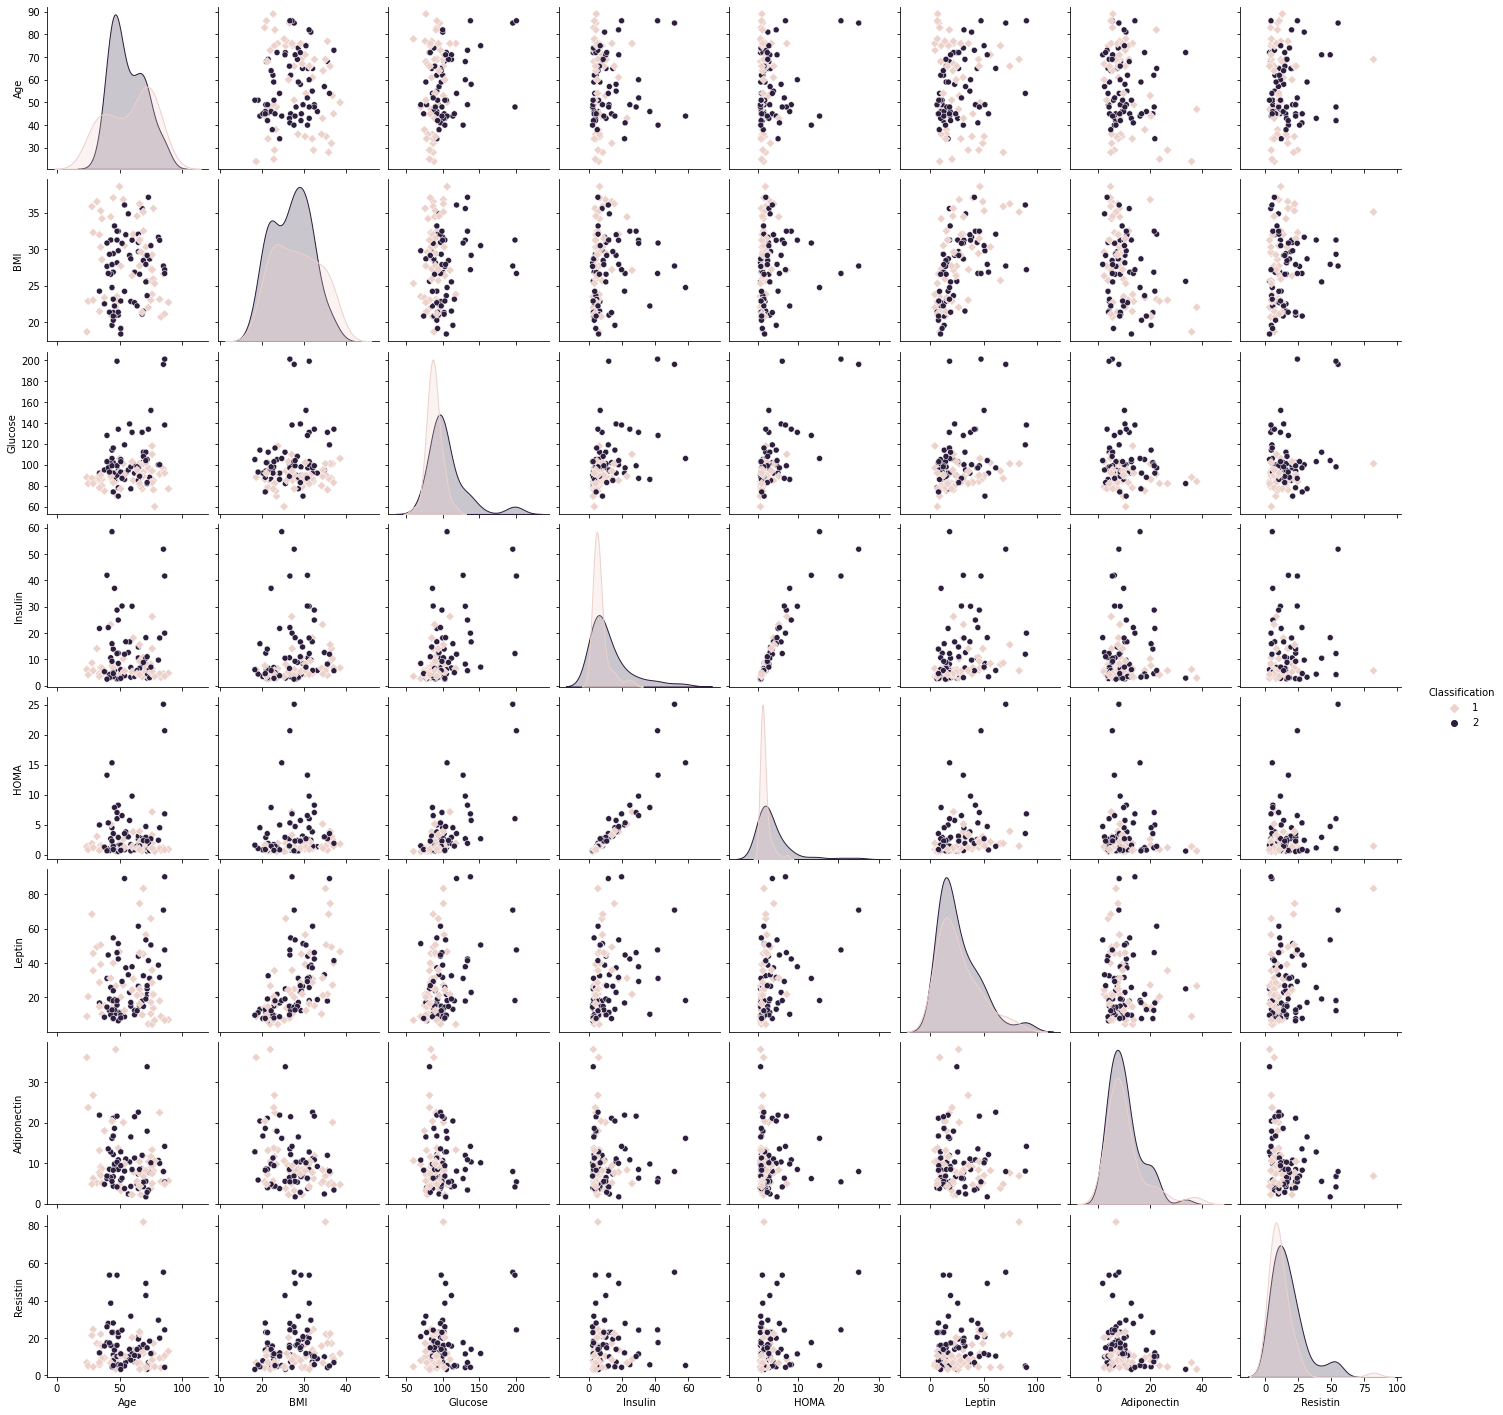

In [8]:
pp = sns.pairplot(data, hue="Classification", vars=features[:-2], markers=["D", "o"])

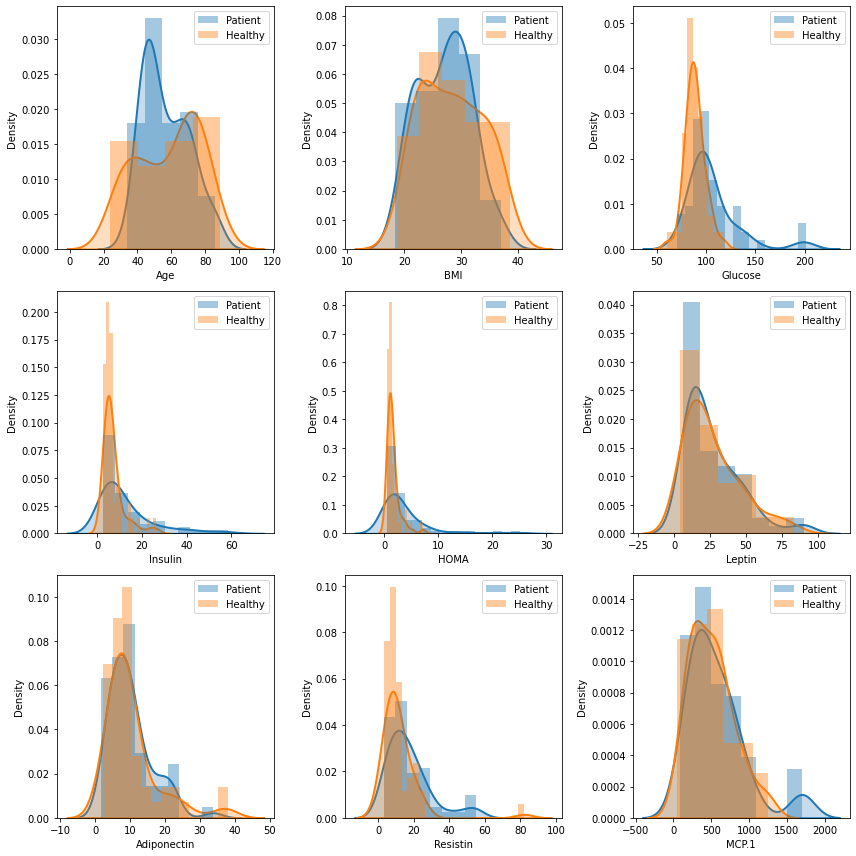

In [9]:
# Histogram and Density(extra)
plt.figure(figsize=(12,12))
features = data.columns[:-2]
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.distplot(data[feature][data['Classification']==2], kde_kws = {'shade': True, 'linewidth': 2}, label='Patient');
    sns.distplot(data[feature][data['Classification']==1], kde_kws = {'shade': True, 'linewidth': 2}, label='Healthy');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Answer:**

In both types of plot, a line cannot seperate points. So, if we use one or two features, this data isn't linear seperable.


## Import requirements for training the models

In [10]:
import sklearn
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Training

In [11]:
# normalization
features = data.columns[:-2]
for feature in features:
    data[feature] = (data[feature] - data[feature].mean())/ data[feature].std()

### Seperating folds

In [21]:
no_folds = 5
fold_size = int(data.shape[0] / no_folds)
CV_folds = []
Train_folds = []
for i in range(no_folds):
    data_copy = data
    if i != no_folds-1:
        data_CV = data_copy[i*fold_size:(i+1)*fold_size]
    else:
        data_CV = data_copy[i*fold_size:]
    data_train = pd.concat([data_copy, data_CV]).drop_duplicates(keep=False)
    CV_folds.append(data_CV)
    Train_folds.append(data_train)

In [22]:
def KfoldCrossValidation(model, cv_folds, train_folds, no_folds=5):
    accs = []
    train_accs = []
    for i in range(no_folds):
        columns = Train_folds[i].columns[:-2]
        X_train = Train_folds[i][columns]
        y_train = Train_folds[i].Classification
        model.fit(X_train, y_train)
        X_test = CV_folds[i][columns]
        y_test = CV_folds[i].Classification
        y_pred = model.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))
        y_pred_train = model.predict(X_train)
        train_accs.append(accuracy_score(y_train, y_pred_train))
    return accs, train_accs

### Logistic Regression

In [23]:
LR_model = LogisticRegression()
LR_accs, LR_accs_train = KfoldCrossValidation(LR_model, CV_folds, Train_folds)
print('Train Accuracy:', np.mean(LR_accs_train))
print('Test Accuracy:', np.mean(LR_accs))

Train Accuracy: 0.7865357643758765
Test Accuracy: 0.7409420289855072


### SVM with linear kernel

In [24]:
LSVM_model = svm.SVC(kernel='linear')
LSVM_accs, LSVM_accs_train = KfoldCrossValidation(LSVM_model, CV_folds, Train_folds)
print('Train Accuracy:', np.mean(LSVM_accs_train))
print('Test Accuracy:', np.mean(LSVM_accs))

Train Accuracy: 0.780060776063581
Test Accuracy: 0.7673913043478261


### SVM with rbf kernel

In [25]:
RBF_SVM_model = svm.SVC(kernel='rbf')
RBF_SVM_accs, RBF_SVM_accs_train = KfoldCrossValidation(RBF_SVM_model, CV_folds, Train_folds)
print('Train Accuracy:', np.mean(RBF_SVM_accs_train))
print('Test Accuracy:', np.mean(RBF_SVM_accs))

Train Accuracy: 0.8792660121552128
Test Accuracy: 0.8007246376811594


### Decision Tree

In [26]:
DT_model = DecisionTreeClassifier()
DT_accs, DT_accs_train = KfoldCrossValidation(DT_model, CV_folds, Train_folds)
print('Train Accuracy:', np.mean(DT_accs_train))
print('Test Accuracy:', np.mean(DT_accs))

Train Accuracy: 1.0
Test Accuracy: 0.6648550724637681


Because decision tree uses all features to seperate data, it overfits. So, we test different max_depth es in order to avoid overfitting.

In [32]:
for i in range(1, 10):
    print('max_depth:', i)
    DT_model = DecisionTreeClassifier(max_depth=i)
    DT_accs, DT_accs_train = KfoldCrossValidation(DT_model, CV_folds, Train_folds)
    print('Train Accuracy:', np.mean(DT_accs_train))
    print('Test Accuracy:', np.mean(DT_accs))
    print('Difference:', np.mean(DT_accs_train) - np.mean(DT_accs))

max_depth: 1
Train Accuracy: 0.7219962599345489
Test Accuracy: 0.6634057971014493
Difference: 0.058590462833099544
max_depth: 2
Train Accuracy: 0.7823515661524076
Test Accuracy: 0.5952898550724638
Difference: 0.18706171107994385
max_depth: 3
Train Accuracy: 0.8858111266947171
Test Accuracy: 0.6815217391304348
Difference: 0.20428938756428228
max_depth: 4
Train Accuracy: 0.9181626928471248
Test Accuracy: 0.6478260869565218
Difference: 0.27033660589060304
max_depth: 5
Train Accuracy: 0.9568957456755494
Test Accuracy: 0.6739130434782609
Difference: 0.2829827021972885
max_depth: 6
Train Accuracy: 0.989247311827957
Test Accuracy: 0.6641304347826086
Difference: 0.3251168770453484
max_depth: 7
Train Accuracy: 0.9956989247311828
Test Accuracy: 0.6644927536231884
Difference: 0.33120617110799444
max_depth: 8
Train Accuracy: 1.0
Test Accuracy: 0.6894927536231884
Difference: 0.3105072463768116
max_depth: 9
Train Accuracy: 1.0
Test Accuracy: 0.6894927536231884
Difference: 0.3105072463768116


It seems **max_depth = 1** is working better and the difference between train and test accuracy is less.

In [35]:
DT_model = DecisionTreeClassifier(max_depth=1)
DT_accs, DT_accs_train = KfoldCrossValidation(DT_model, CV_folds, Train_folds)
print('Train Accuracy:', np.mean(DT_accs_train))
print('Test Accuracy:', np.mean(DT_accs))

Train Accuracy: 0.7219962599345489
Test Accuracy: 0.6634057971014493


### KNN

In [33]:
max_acc = -1
for i in range(1, 20):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_accs, KNN_accs_train = KfoldCrossValidation(KNN_model, CV_folds, Train_folds)
    if np.mean(KNN_accs) > max_acc:
        max_acc = np.mean(KNN_accs)
        max_acc_train = np.mean(KNN_accs_train)
        nn = i
print('Train Accuracy:', max_acc_train, 'with', nn, 'neighbours')
print('Test Accuracy:', max_acc, 'with', nn, 'neighbours')

Train Accuracy: 0.8361150070126226 with 5 neighbours
Test Accuracy: 0.775 with 5 neighbours


### All models in a plot

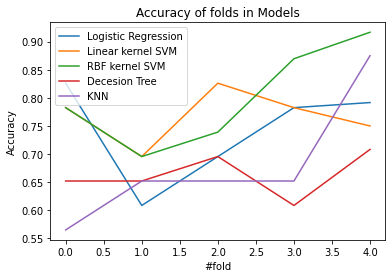

In [36]:
plt.plot(LR_accs, label='Logistic Regression')
plt.plot(LSVM_accs, label='Linear kernel SVM')
plt.plot(RBF_SVM_accs, label='RBF kernel SVM')
plt.plot(DT_accs, label='Decesion Tree')
plt.plot(KNN_accs, label='KNN')
plt.xlabel("#fold")
plt.ylabel("Accuracy")
plt.title("Accuracy of folds in Models")
plt.legend()
plt.show()

The above plot shows that **SVM with rbf kernel** is more accurate model compared to the others.